<a href="https://colab.research.google.com/github/YuxingW/deep_learning/blob/main/hw3/part_b2_pytorch_auto_differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Pytorch tensor data structure with auto differentiation

In [22]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

#### 3d-2d non-linear data generation

If x is numpy array this will apply auto differentiation requires_grad to torch tensor:<br />
torch.tensor(x, requires_grad=True)


In [23]:
n_samples = 200
input_dim = 3

x_true = torch.FloatTensor(n_samples, input_dim).uniform_(-1,1)
weights_true = torch.FloatTensor([[5, 1, 4],[2, 1, 2]]).T
bias_true = torch.tensor([0.5, 0.25])
# y = (x ** 2) @ weights_true + x @ weights_true + bias_true
y_true = torch.mm(x_true ** 2, weights_true) + torch.mm(x_true, weights_true) + bias_true

x = x_true.clone().detach().requires_grad_(True).float()
y = y_true.clone().detach().requires_grad_(True).float()

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y.shape}')

x: torch.Size([200, 3]), weights: torch.Size([3, 2]), bias: torch.Size([2]), y: torch.Size([200, 2])


#### Define model and loss

In [24]:
def model(x, weights, bias):
    return torch.mm(x ** 2, weights) + torch.mm(x, weights) + bias

In [25]:
def loss_fn(y_pred, y_true):
    squared_diffs = (y_pred - y_true)**2
    return squared_diffs.mean()

####Initialize weights and bias for model

In [26]:
weights = torch.FloatTensor([[1.0, 1.0, 1.0],[1.0, 1.0, 1.0]]).T
bias = torch.tensor([0.1, 0.21])
weights = weights_init.clone().detach().requires_grad_(True).float()
bias = bias_init.clone().detach().requires_grad_(True).float()

In [27]:
import torch.optim as optim

####Initialize learning rate and optimizer

In [28]:
learning_rate = 1e-3
optimizer = optim.SGD([weights, bias,], lr=learning_rate)

####Do one step training

In [29]:
y_pred = model(x, weights, bias)
loss = loss_fn(y_pred, y)
loss.backward()

optimizer.step()

y_pred.shape

torch.Size([200, 2])

####Do training loop with eporches

In [30]:
def training_loop(n_epochs, optimizer, weights, bias, x, y):
    for epoch in range(1, n_epochs + 1):
        y_pred = model(x, weights, bias) 
        loss = loss_fn(y_pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 1000 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return y_pred

In [31]:
y_pred = training_loop(
    n_epochs = 20000, 
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    x = x,
    y = y)

Epoch 1000, Loss 1.813629
Epoch 2000, Loss 0.746683
Epoch 3000, Loss 0.373647
Epoch 4000, Loss 0.194523
Epoch 5000, Loss 0.103404
Epoch 6000, Loss 0.055881
Epoch 7000, Loss 0.030610
Epoch 8000, Loss 0.016951
Epoch 9000, Loss 0.009469
Epoch 10000, Loss 0.005326
Epoch 11000, Loss 0.003012
Epoch 12000, Loss 0.001711
Epoch 13000, Loss 0.000975
Epoch 14000, Loss 0.000557
Epoch 15000, Loss 0.000319
Epoch 16000, Loss 0.000183
Epoch 17000, Loss 0.000105
Epoch 18000, Loss 0.000060
Epoch 19000, Loss 0.000035
Epoch 20000, Loss 0.000020


####Plot y_true y_pred using TSNE

In [32]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_comparison(y_true, y_pred):
  #tsne = TSNE(n_components=2, perplexity=50, learning_rate=100, random_state=120)
  tsne = TSNE(n_components=2, random_state=0)
  yt_2d = tsne.fit_transform(y_true)
  yp_2d = tsne.fit_transform(y_pred)

  plt.figure(figsize=(6, 5))
  plt.scatter(yt_2d[:, 0], yt_2d[:, 1], c='b', label='y_true')
  plt.scatter(yp_2d[:, 1], yp_2d[:, 1], c='y', label='y_pred')
  plt.legend()
  plt.title('TSNE Y_True Y_Pred Comparison')
  plt.xlabel('t_SNE1')
  plt.xlabel('t_SNE2')
  plt.show()

def plot_distribution(x, y_true, y_pred):
  tsne = TSNE(n_components=1, random_state=0)
  x_2d = tsne.fit_transform(x)
  yt_2d = tsne.fit_transform(y_true)
  yp_2d = tsne.fit_transform(y_pred)

  plt.figure(figsize=(6, 5))
  plt.scatter(x_2d[:, 0], yt_2d[:, 0], c='b', label='y_true')
  plt.scatter(x_2d[:, 0], yp_2d[:, 0], c='y', label='y_pred')
  plt.legend()
  plt.title('TSNE Y_True Y_Pred Distribution with X')
  plt.show()

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='y_true')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='y_pred')
  plt.legend()

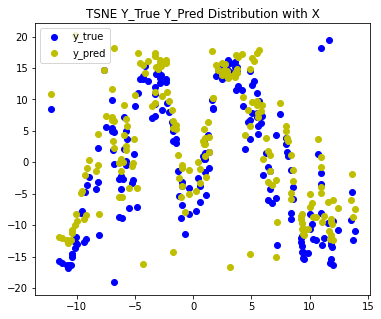

In [33]:
plot_distribution(x.detach().numpy(), y.detach().numpy(), y_pred.detach().numpy())

In [34]:
y_pred.shape

torch.Size([200, 2])

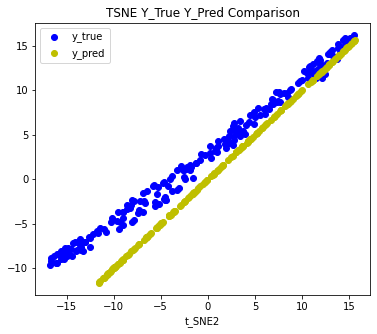

In [35]:
plot_comparison(y.detach().numpy(), y_pred.detach().numpy())

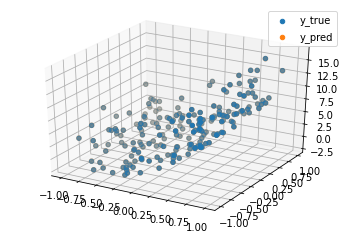

In [36]:
y_pred_np = y_pred.detach().numpy()
y_true_np = y.detach().numpy()
plot_3d(x.detach().numpy(), y_true_np[:, 0], y_pred=y_pred_np[:, 0])